<a href="https://colab.research.google.com/github/Amey-Thakur/PYTHON-CRASH-COURSE/blob/main/PYTHON_CRASH_COURSE_DAY_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Day 12

# **Google stock price prediction - RNN**

In [1]:
#Lets import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#lets import the training set
dataset_train = pd.read_csv('/content/Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2]
training_set.head()

,Open
0,325.25
1,331.27
2,329.83
3,328.34
4,322.04


In [3]:
#Perform Feature Scaling
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler(feature_range = (0,1))
training_set_scaled = sc.fit_transform(training_set) 

In [4]:
#Use case implementation of LSTM
#lets create a data structure with 60 timesteps and 1 output

X_train = []
Y_train = []

for i in range(60, 1258):
  X_train.append(training_set_scaled[i-60:i, 0])
  Y_train.append(training_set_scaled[i,0])

X_train, Y_train = np.array(X_train), np.array(Y_train)

#Lets reshape the arrays
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))


In [5]:
#lets import required keras libs and packages
from keras.models import  Sequential
from keras.layers import Dense, LSTM, Dropout

In [6]:
#Initializing the RNN
regressor = Sequential()

In [7]:
#Lets add LSTM layers and dropout regularization
regressor.add(LSTM(units=50, return_sequences=True,input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.2))

In [8]:
#Lets add second LSTM layer and dropout regularization
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

In [9]:
#Lets add third LSTM layer and dropout regularization
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

In [10]:
#Lets add fourth LSTM layer and dropout regularization
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

In [11]:
#Adding output layer
regressor.add(Dense(units=1))

In [12]:
#Lets compile the RNN
regressor.compile(optimizer='adam',loss='mean_squared_error')

In [13]:
#Fit the compiled model to training set
regressor.fit(X_train, Y_train, epochs=100, batch_size=32)

Epoch 1/100
38/38 [==============================] - 29s 125ms/step - loss: 0.0838
Epoch 2/100
38/38 [==============================] - 5s 125ms/step - loss: 0.0075
Epoch 3/100
38/38 [==============================] - 5s 123ms/step - loss: 0.0064
Epoch 4/100
38/38 [==============================] - 5s 124ms/step - loss: 0.0066
Epoch 5/100
38/38 [==============================] - 5s 122ms/step - loss: 0.0049
Epoch 6/100
38/38 [==============================] - 5s 121ms/step - loss: 0.0052
Epoch 7/100
38/38 [==============================] - 5s 124ms/step - loss: 0.0053
Epoch 8/100
38/38 [==============================] - 5s 122ms/step - loss: 0.0046
Epoch 9/100
38/38 [==============================] - 5s 124ms/step - loss: 0.0060
Epoch 10/100
38/38 [==============================] - 5s 124ms/step - loss: 0.0056
Epoch 11/100
38/38 [==============================] - 5s 123ms/step - loss: 0.0042
Epoch 12/100
38/38 [==============================] - 5s 124ms/step - loss: 0.0048
Epoch 13/100

In [14]:
#lets load the stock price test data
dataset_test = pd.read_csv('/content/Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:,1:2].values

In [15]:
#Get predicted stock price for the following year
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']),axis=0)

inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1, 1)
inputs = sc.transform(inputs)
X_test = []

for i in range(60, 80):
  X_test.append(inputs[i-60:i, 0])

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

predicted_stock_price = regressor.predict(X_test)

predicted_stock_price = sc.inverse_transform(predicted_stock_price)

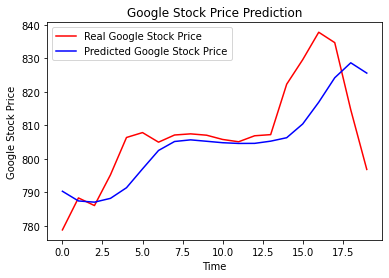

In [16]:
#lets visualize the results of predicted and real stock price
plt.plot(real_stock_price, color='r', label='Real Google Stock Price')
plt.plot(predicted_stock_price, color='b', label='Predicted Google Stock Price')

plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()